In [1]:
from PyPurityTools import PyPurityTools as ppt
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.signal import savgol_filter
import matplotlib.style
import matplotlib as mpl
import math
import scipy.fftpack
from scipy.signal import butter,filtfilt
from matplotlib.ticker import MaxNLocator

import scipy.fftpack

#Set default figure size
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})

In [102]:
#Get some data
#dirName="/Users/rjn/dune/data/preampCalibration_10052022/"
#dirName="/Users/rjn/dune/data/preampA_tests_05.22/"
dirName="/Users/rjn/dune/data/preampA_tests_rjn/"

#New way to read a list of files
import glob,os
import datetime
fileBase='LongRun_Stability_'
#fileBase='10MOhm_473nF_10ms_103mV_5.5turns'


#Here we get all the files that match the pattern dirName+fileBase+'*.chX.traces'
ch3Files=[text for text in glob.glob(dirName+fileBase+'*.ch3.traces')]
ch4Files=[text for text in glob.glob(dirName+fileBase+'*.ch4.traces')]
ch3Files.sort(key=lambda x: os.path.getmtime(x))
ch4Files.sort(key=lambda x: os.path.getmtime(x))
mtimeList=[datetime.datetime.fromtimestamp(os.path.getmtime(x)) for x in ch3Files]
timeStringList=[(text.removeprefix(dirName+fileBase)).removesuffix('.ch3.traces') for text in ch3Files]

#ch3Files=sorted(ch3Files)
#ch4Files=sorted(ch4Files)
#timeStringList=sorted(timeStringList)





In [103]:

#fileBase="preampA_473nF_captest_oneleg_take2"
#fileBase="preampA_473nF_captest_inbox_oneleg"
#fileBase="preampA_473nF_captest_15MOhm_resistor"
#fileBase="preampA_473nF_captest_15MOhm_resistor_lidscrewedon"
#fileBase="preampA_473nF_captest_15MOhm_resistor_lidscrewedon_take2"
#fileBase="preampA_473nF_captest_oneleg_boxopen"
#fileBase="preampA_473nF_captest_oneleg_boxclosed"
#fileBase="preampA_473nF_captest_oneleg_boxclosed_screwson_all"
#fileBaseList=['preampA_473nF_captest_1GOhm_lidscrewedon','preampA_473nF_captest_1GOhm_lidscrewedon_take2','preampA_473nF_captest_1GOhm_lidscrewedon_take3','preampA_473nF_captest_50MOhm_lidscrewedon','preampA_473nF_captest_10MOhm_lidscrewedon','preampA_473nF_captest_10MOhm_lidscrewedon_take2','preampA_473nF_captest_1GOhm_lidscrewedon_take4']
#fileBaseList=['preampA_473nF_captest_1GOhm_reset','preampA_473nF_captest_1GOhm_reset_take2','preampA_473nF_captest_1GOhm_reset_take3']
#fileBaseList=[
#              'preampK_box_grounded_10:59',
#              'preampK_box_grounded_11:02',
#              'preampK_box_grounded_11.06',
#              'preampK_box_grounded_11.21',
#              'preampK_box_grounded_11.37'  
#             ]

#fileBase='LongRun_Stability_'
#timeStringList=['00.30','01.00','01.31','02.01','02.31','03.02',
#          '03.32','04.02','04.33','05.03','05.34','06.04',
#          '07.05','07.35','08.06','08.36','09.06','09.37']

#fileBaseList=[   
#    '10MOhm_473nF_10ms_3oclock',
#    '10MOhm_473nF_10ms_3oclock_14.35',
#    '10MOhm_473nF_10ms_3oclock_14.40'
#]
#fileBaseList=[
#    '10MOhm_473nF_10ms_1oclock_14.54',
#    '10MOhm_473nF_10ms_1oclock_14.57',
#    '10MOhm_473nF_10ms_1oclock_15.04',
#    '10MOhm_473nF_10ms_1oclock_15.15'
#]
#fileBaseList=[
#    '_16.56',
#    '10MOhm_473nF_10ms_103mV_5.5turns_17.00',
#    '10MOhm_473nF_10ms_103mV_5.5turns_17.05',
#    '10MOhm_473nF_10ms_103mV_5.5turns_17.10',
#    '10MOhm_473nF_10ms_103mV_5.5turns_17.15',
#    '10MOhm_473nF_10ms_103mV_5.5turns_17.20'
#]
    
#The line below use Python list comprehension to make a new list e.g. [x for x in listOfX]
#inputThing = [ppt.getScopeWaveforms(dirName+fileBase+".ch4.traces",False) for fileBase in fileBaseList]
#outputThing = [ppt.getScopeWaveforms(dirName+fileBase+".ch3.traces",False) for fileBase in fileBaseList]
inputThing = [ppt.getScopeWaveforms(fileName,False) for fileName in ch4Files]
outputThing = [ppt.getScopeWaveforms(fileName,False) for fileName in ch3Files]



#The line below use Python list comprehension to make a new list e.g. [x for x in listOfX]
inputAvg = [np.mean(thing[0],axis=0) for thing in inputThing]
outputAvg = [np.mean(thing[0],axis=0) for thing in outputThing]

#Let's just assume all the times are the same
timeList=inputThing[0][1]

17.24  --- minimum=-0.143V
17.55  --- minimum=-0.143V
18.25  --- minimum=-0.143V
18.55  --- minimum=-0.143V
19.26  --- minimum=-0.143V
19.56  --- minimum=-0.143V
20.27  --- minimum=-0.143V
20.57  --- minimum=-0.143V
21.27  --- minimum=-0.143V
21.58  --- minimum=-0.143V
22.28  --- minimum=-0.143V
22.59  --- minimum=-0.143V
23.29  --- minimum=-0.143V
23.59  --- minimum=-0.143V
00.30  --- minimum=-0.143V
01.00  --- minimum=-0.143V
01.31  --- minimum=-0.143V
02.01  --- minimum=-0.143V
02.31  --- minimum=-0.143V
03.02  --- minimum=-0.143V
03.32  --- minimum=-0.143V
04.02  --- minimum=-0.143V
04.33  --- minimum=-0.143V
05.03  --- minimum=-0.143V
05.34  --- minimum=-0.143V
06.04  --- minimum=-0.143V
06.34  --- minimum=-0.143V
07.05  --- minimum=-0.143V
07.35  --- minimum=-0.143V
08.06  --- minimum=-0.143V
08.36  --- minimum=-0.143V
09.06  --- minimum=-0.143V
09.37  --- minimum=-0.143V
10.07  --- minimum=-0.143V
10.38  --- minimum=-0.143V
11.08  --- minimum=-0.143V
11.38  --- minimum=-0.143V
1

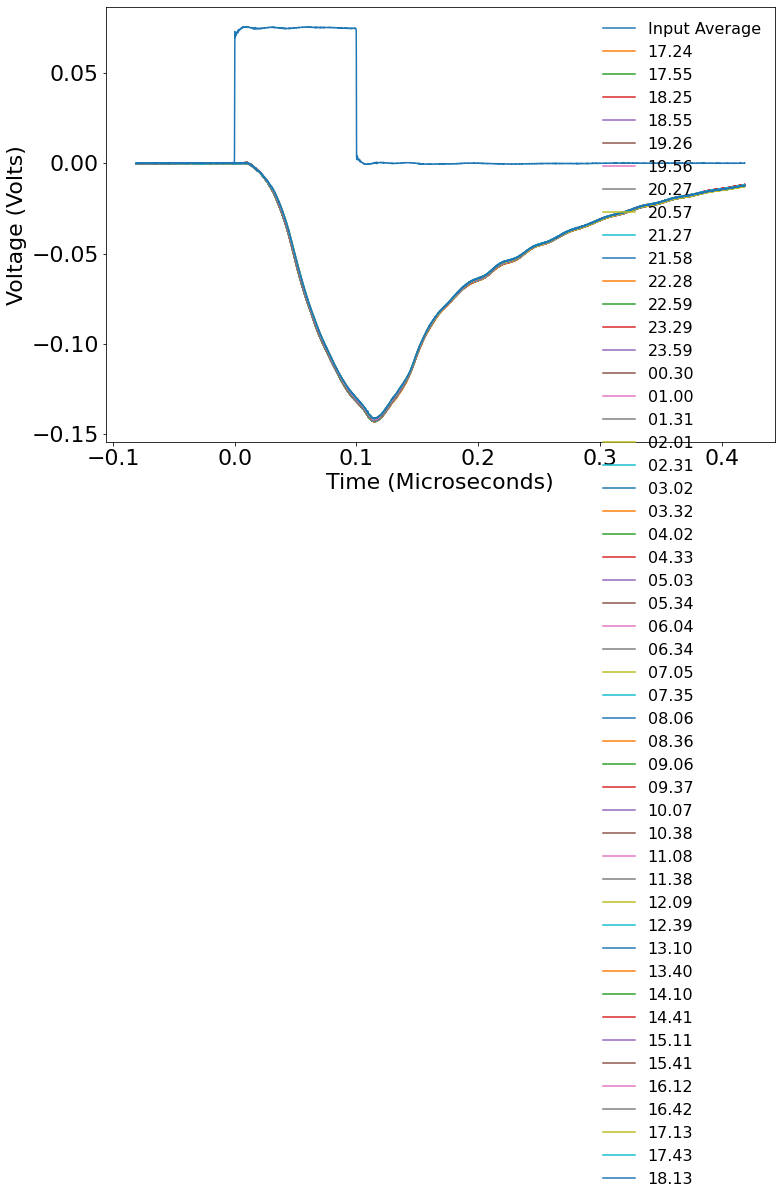

In [104]:
dt=timeList[1]-timeList[0]
fs=1./dt

#Do some zero subtraction
for i in range(np.shape(inputAvg)[0]):
    inputAvg[i]-=np.mean(inputAvg[i][0:100]) #Taking the mean of samples 0-100 as the baseline
    outputAvg[i]-=np.mean(outputAvg[i][0:100]) #Taking the mean of samples 0-100 as the baseline

fig, ax = plt.subplots(facecolor='white')
ax.plot(timeList,inputAvg[0],label="Input Average")
for idx,output in enumerate(outputAvg):
    print(timeStringList[idx]," --- minimum="+f"{np.min(output):1.3g}"+"V")
    ax.plot(timeList,output,label=timeStringList[idx])
ax.set_xlabel("Time (Microseconds)")
ax.set_ylabel("Voltage (Volts)")
ax.legend(fontsize=16)


(array([19132.75 , 19132.875, 19133.   , 19133.125, 19133.25 , 19133.375,
        19133.5  , 19133.625, 19133.75 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

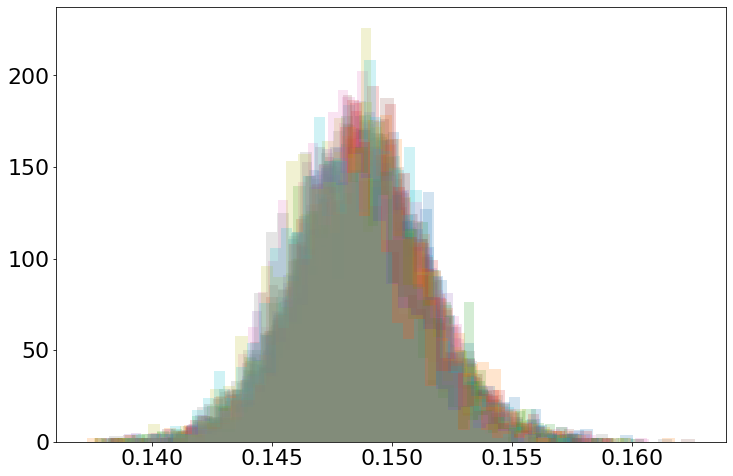

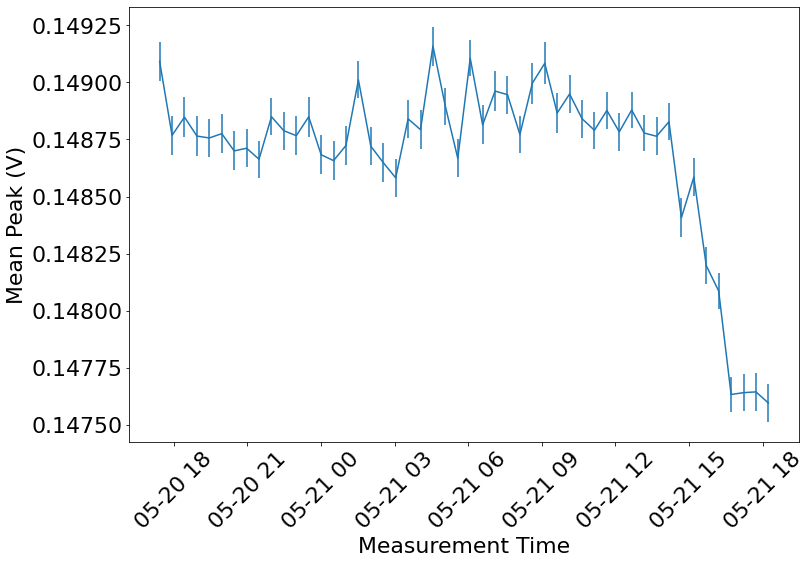

In [109]:
from scipy.stats import norm

meanList=[]
errList=[]
sigmaList=[]

fig, ax = plt.subplots()    
for idx,output in enumerate(outputThing):
    help=np.array(output[0])
    minVal=np.min(help,axis=1)
    baseline=np.mean(help[:,0:500],axis=1)
    #print(minVal.shape)
    #print(baseline.shape)
    values=baseline-minVal
    #ax.set_title(timeStringList[idx])
    n, bins, patches=ax.hist(values,bins=40,density=1,alpha=0.2)
    #ax.set_xlabel("Peak Size -(min - baseline)")
    mu, sigma = scipy.stats.norm.fit(values)
    meanList.append(mu)
    sigmaList.append(sigma)
    errList.append(sigma/np.sqrt(len(values)))
    #best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
    #label=f'$\mu$={mu:.3f}, $\sigma=${sigma:.4f}'
    #ax.plot(bins, best_fit_line,label=label)
    #ax.legend(fontsize=18)
    
    
fig, ax = plt.subplots(facecolor='white')
xVals=np.arange(len(meanList))
ax.errorbar(mtimeList,meanList,yerr=errList)
ax.set_xlabel("Measurement Time")
ax.set_ylabel("Mean Peak (V)")
plt.xticks(rotation=45)

#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
   

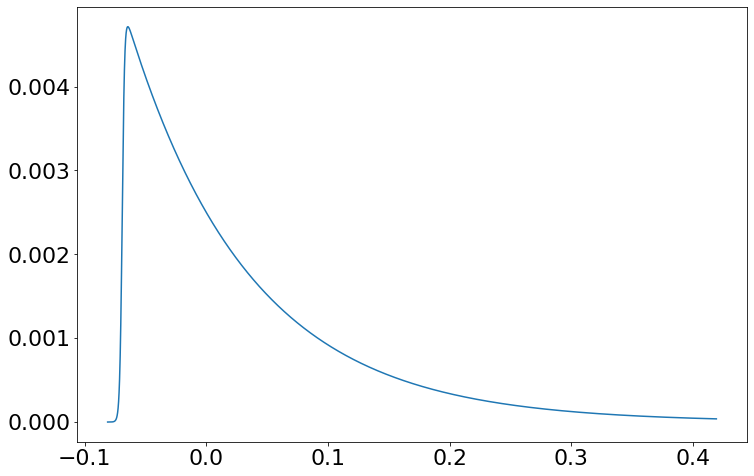

In [94]:
#Define a function which will operate on an array of x values all at once
#This function is zero until some offset and then exponential falls with a given time constant
def response2(x,offset,tau,tauRise,norm):
    return norm*(1/(1+np.exp(-(x-offset)/tauRise)))*np.exp(-x/tau)  

#Define a function which will operate on an array of x values all at once
#This function is zero until some offset and then exponential falls with a given time constant
def response(x,offset,tau,norm):
    conds = [x<0,(x>=0) & (x < offset), x>=offset]   #The two regions of x
    funcs = [lambda x: 0, lambda x:0, lambda x: norm*np.exp(-x/tau)]  #the lambda keyword is allowing us to define a quick function
    return np.piecewise(x, conds, funcs)  #Now do the piecewise calculation and return it


offset=timeList[120]
tau=0.1
tauRise=0.001
norm=0.0025
fig, ax = plt.subplots()
ax.plot(timeList[0:10000],response2(timeList[0:10000],offset,tau,tauRise,norm),label="Response Function")



[-0.0635959   0.11344664  0.00131074 -0.00167355]
[-0.06332336  0.1133845   0.00135471 -0.00166903]
[-0.06304175  0.11252266  0.00132472 -0.001663  ]
[-0.0630127   0.11270339  0.00135896 -0.00166312]
[-0.06300835  0.112961    0.00138095 -0.00166422]
[-0.06304217  0.11432621  0.00128384 -0.00166454]
[-0.0628653   0.11337182  0.00126305 -0.00165327]


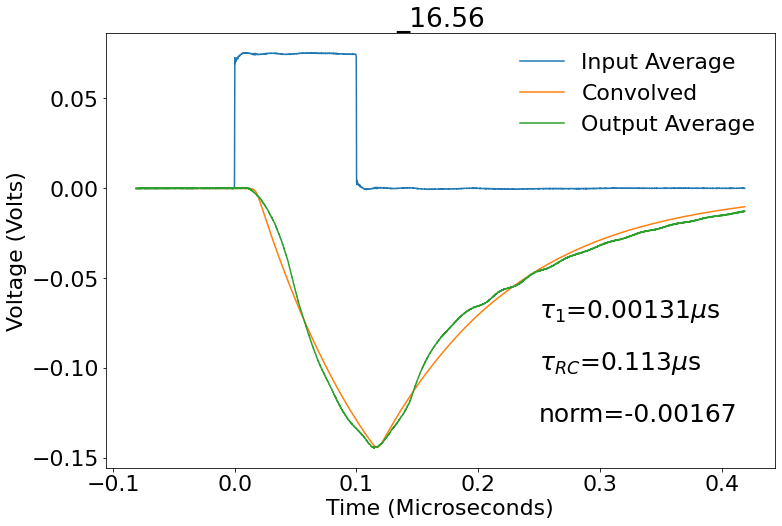

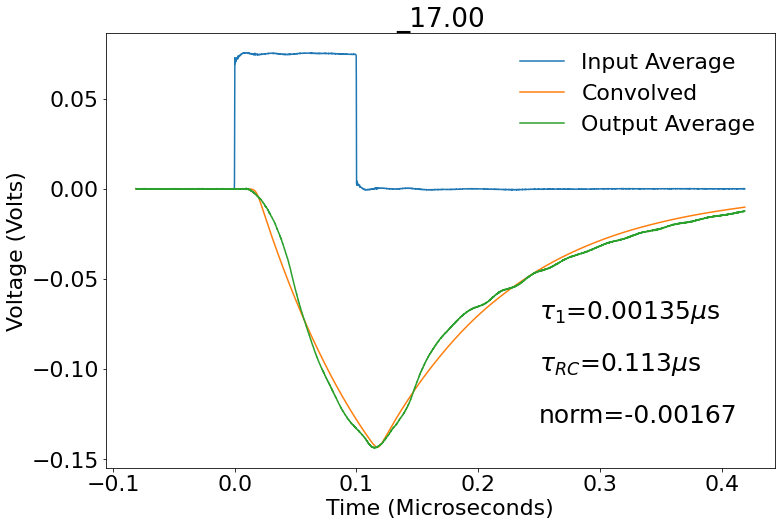

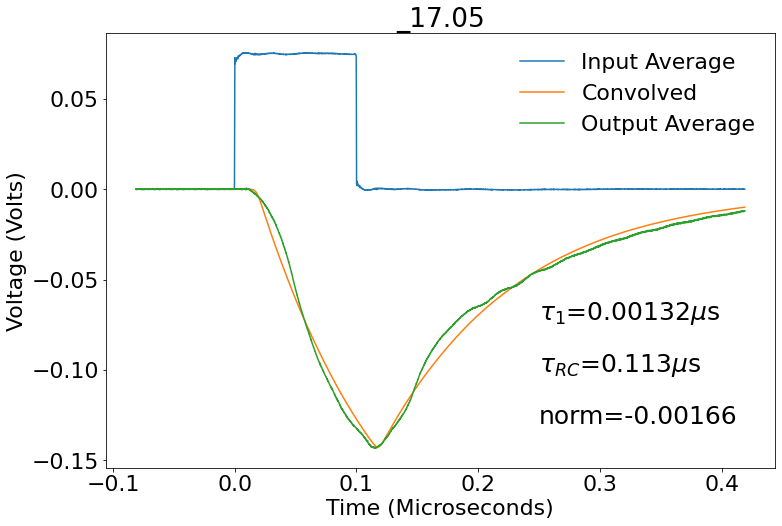

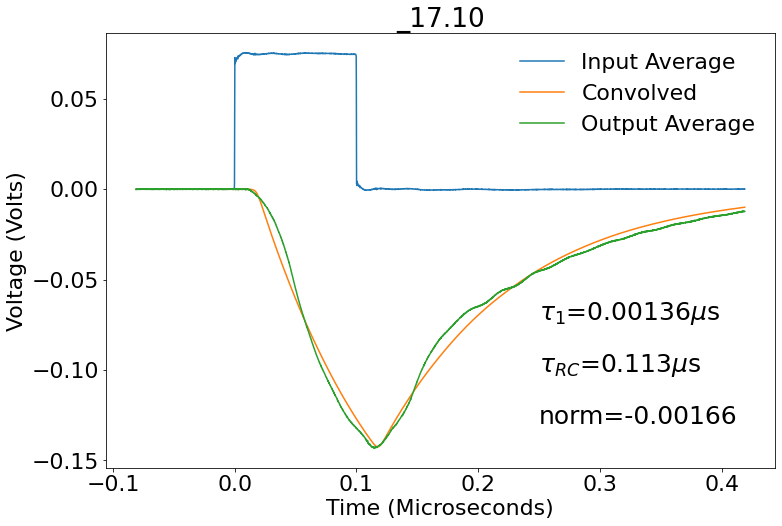

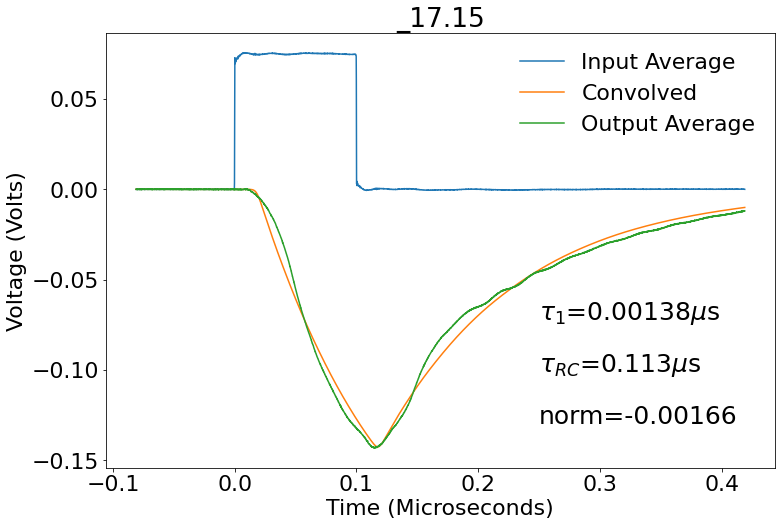

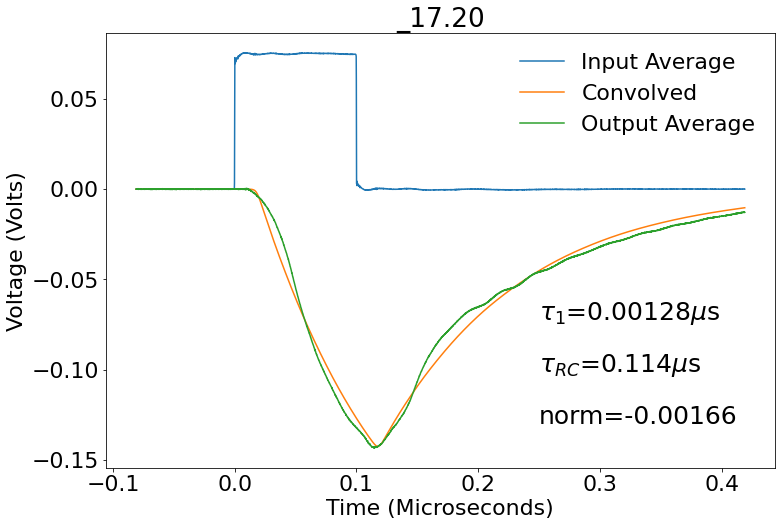

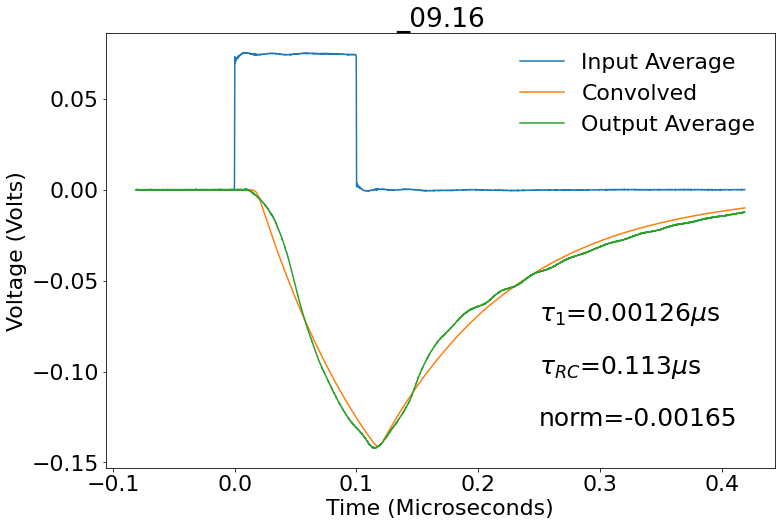

In [96]:
def func(xdata,offset,tau,norm):
    return signal.convolve(xdata, response(timeList,offset,tau,norm), mode='full')[0:len(xdata)] 

def func2(xdata,offset,tau,tauRise,norm):
    return signal.convolve(xdata, response2(timeList,offset,tau,tauRise,norm), mode='full')[0:len(xdata)] 

import scipy.signal as signal
from scipy.optimize import curve_fit

for idx,output in enumerate(outputAvg):
    popt, pcov = curve_fit(func2, inputAvg[idx], outputAvg[idx],p0=[offset,tau,tauRise,-1*norm])
    print(popt)
    fig, ax = plt.subplots()
    ax.plot(timeList,inputAvg[idx],label="Input Average")
    ax.plot(timeList,func2(inputAvg[idx],popt[0],popt[1],popt[2],popt[3]),label="Convolved")
    ax.plot(timeList,outputAvg[idx],label="Output Average")
    ax.set_title(timeStringList[idx])
    ax.set_xlabel("Time (Microseconds)")
    ax.set_ylabel("Voltage (Volts)")
    ax.legend()

    minVal=np.min(outputAvg)

    textLabel=r"$\tau_1$="+f"{popt[2]:1.3g}"+"$\mu$s"
    plt.text(0.25, minVal*0.5, textLabel, fontsize=25)
    textLabel=r"$\tau_{RC}$="+f"{popt[1]:1.3g}"+"$\mu$s"
    plt.text(0.25, minVal*0.7, textLabel, fontsize=25)#ax.set_xlim(-0.01,0.111)
    textLabel=r"norm="+f"{popt[3]:1.3g}"
    plt.text(0.25, minVal*0.9, textLabel, fontsize=25)#ax.set_xlim(-0.01,0.111)



Text(0, 0.5, 'Response (units?)')

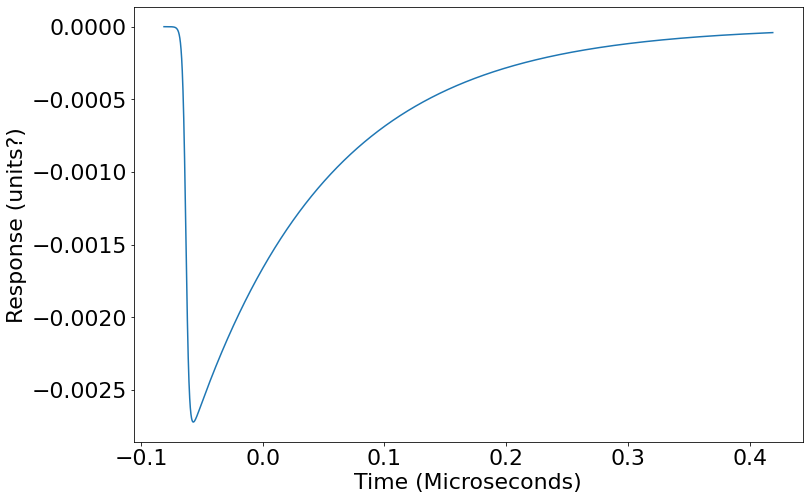

In [32]:

    
fig, ax = plt.subplots(facecolor='white')
ax.plot(timeList[0:10000],response2(timeList[0:10000],popt[0],popt[1],popt[2],popt[3]),label="Response Function")
ax.set_xlabel("Time (Microseconds)")
ax.set_ylabel("Response (units?)")